<a href="https://colab.research.google.com/github/allenwang0713/tebaml0315/blob/main/minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from tensorflow.keras.datasets import mnist
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


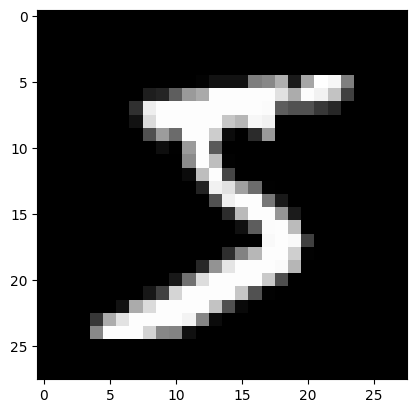

In [34]:
# colormap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
import pandas as pd
import matplotlib.pyplot as plt

# 灰階圖片(0: 黑色 255: 白色)
pd.DataFrame(x_train[0])
plt.imshow(x_train[0], cmap="gray")

激活函式的選擇很重要

1.輸出層: 看狀況

2.中間層: relu family(m=1)

In [35]:
# models(地基): Sequential(一層疊一層) Model(自由疊層)
# layers: Dense(全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 748 * 128 + 128(bias)
    Dense(128, activation="relu", input_dim=784),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


$ p_i = 正確答案 $

$ q_i = 預測值 $

$ categoricalcrossentropy(標準ce) = \sum p_ilog\frac {1}{q_i}  $

如果你最後輸出只有一個的時候你要使用 BinaryCrossentropy

因為你輸出的q -> q: 1這種東西 (1-q): 另外一種東西

$ binarycrossentropy = plog\frac {1}{q}+(1-p)log\frac{1}{1-q} $

In [36]:
# crossentropy:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), metrics=["accuracy"])

In [37]:
# y
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [38]:
import numpy as np
# tensorflow建議: x(0~1) x(-1~1)
# tensorflow隨機的weight有配合
# reshape你可以把一個位置替換成-1(讓他自己算)
# x_train.reshape(60000, 784)
x_train_norm = x_train.reshape(-1, 784)
x_test_norm = x_test.reshape(-1, 784)
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 784)
(10000, 784)


In [39]:
# epochs: 決定要把整份資料看過幾輪
# 絕對不是越多越好, 越多越過擬和, 反而導致現實資料錯更多
# validation_split: 擬要切出一部分不給模型看, 來驗證這組參數表現得如何
# 一輪: 54000(90%) / 100 -> 540
# 10 epochs: 540 * 10
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    ModelCheckpoint("mnist.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=100,
     epochs=40,
     validation_split=0.1,
     callbacks=c)

Epoch 1/40
540/540 [==============================] - 3s 5ms/step - loss: 3.6380 - accuracy: 0.8605 - val_loss: 0.4797 - val_accuracy: 0.9093
Epoch 2/40
540/540 [==============================] - 3s 6ms/step - loss: 0.4892 - accuracy: 0.9182 - val_loss: 0.4174 - val_accuracy: 0.9318
Epoch 3/40
540/540 [==============================] - 2s 4ms/step - loss: 0.3536 - accuracy: 0.9396 - val_loss: 0.3244 - val_accuracy: 0.9480
Epoch 4/40
540/540 [==============================] - 2s 4ms/step - loss: 0.2829 - accuracy: 0.9501 - val_loss: 0.2923 - val_accuracy: 0.9502
Epoch 5/40
540/540 [==============================] - 2s 4ms/step - loss: 0.2413 - accuracy: 0.9576 - val_loss: 0.2479 - val_accuracy: 0.9583
Epoch 6/40
540/540 [==============================] - 3s 5ms/step - loss: 0.2144 - accuracy: 0.9621 - val_loss: 0.3213 - val_accuracy: 0.9613
Epoch 7/40
540/540 [==============================] - 3s 6ms/step - loss: 0.1892 - accuracy: 0.9665 - val_loss: 0.3389 - val_accuracy: 0.9577
Epoch 

In [42]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.3670 - accuracy: 0.9520


[0.36698782444000244, 0.9520000219345093]

如果你在tf裡, 你的答案都是帶one-hot encoding 不是的畫 都帶原本

In [43]:
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(true)".format(i) for i in range(10)],
       columns=["{}(pred)".format(i) for i in range(10)])

313/313 [==============================] - 1s 2ms/step


,0(pred),1(pred),2(pred),3(pred),4(pred),5(pred),6(pred),7(pred),8(pred),9(pred)
0(true),958,0,2,1,0,4,7,2,6,0
1(true),0,1119,4,1,0,1,3,2,5,0
2(true),6,5,979,3,2,2,4,16,13,2
3(true),0,3,7,930,0,40,0,12,17,1
4(true),2,2,2,1,914,1,17,3,2,38
5(true),5,2,0,6,3,857,5,3,10,1
6(true),6,2,0,0,8,17,921,1,3,0
7(true),1,4,14,9,6,2,0,974,5,13
8(true),5,2,4,7,10,14,6,5,915,6
9(true),3,5,0,10,13,8,0,9,8,953


In [45]:
# 如果你不帶參數, 他會展開成為一個list, 把最大位置列出來
# 如果你帶入axis這個參數, axis=0, 直的看, 找最大值所在位置
#             axis=1(-1), 橫的看
np.array([
    [1, 3],
    [0.5, 2]
]).argmax(axis=1)

array([1, 1])

In [46]:
# demo: nonzero
np.nonzero(np.array([
    [0, 1],
    [0, 0],
    [0, 2]
]))

(array([0, 2]), array([1, 1]))

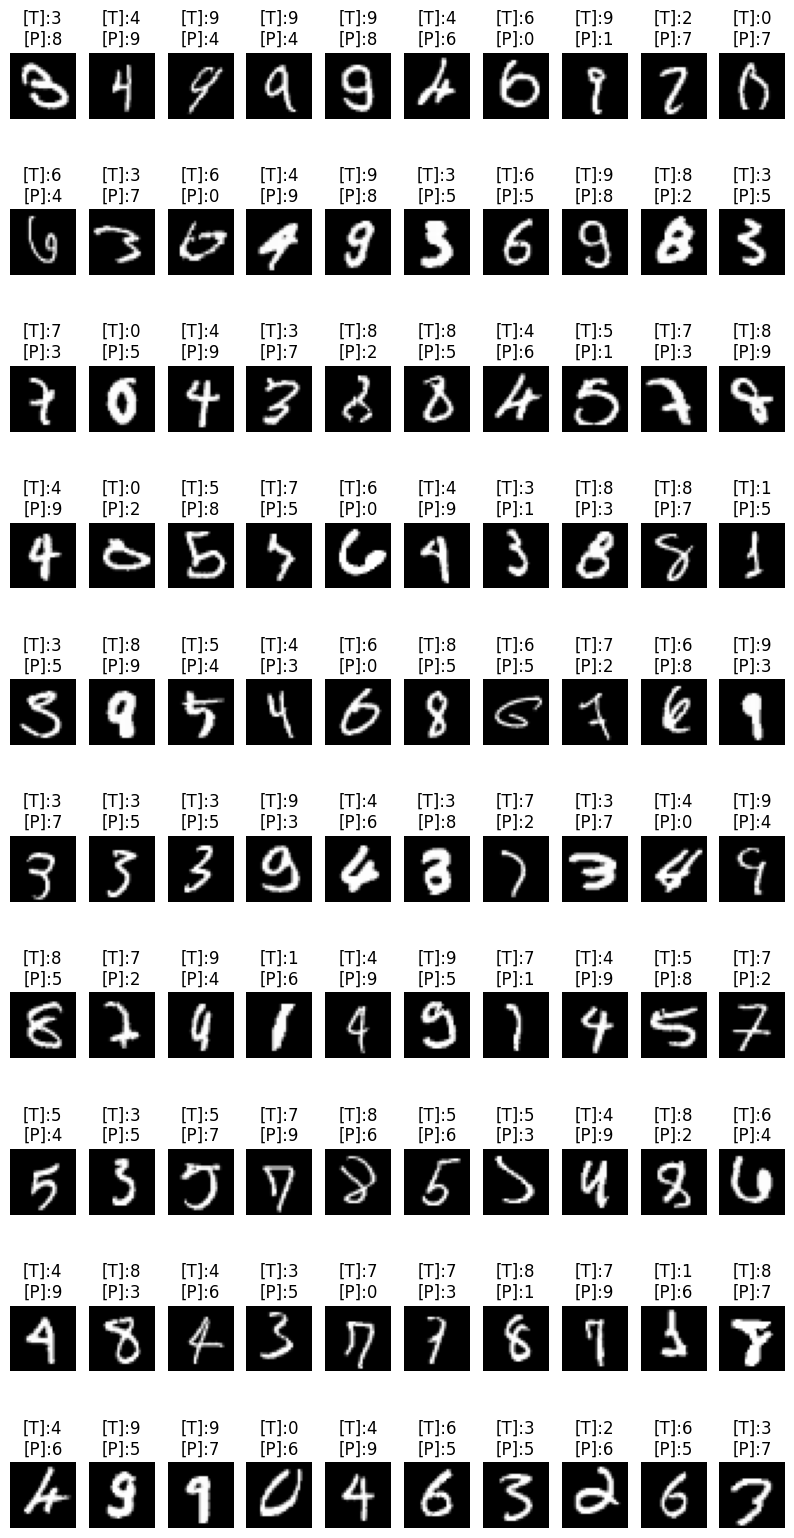

In [47]:
idx = np.nonzero(y_test != pre)[0]
idx = idx[:100]
plt.figure(figsize=(10, 20))
# 預測錯誤的預測值
fp_pred = pre[idx]
# 預測錯誤的真實值
fp_true = y_test[idx]
# 預測錯誤的圖片
fp_img = x_test[idx]
for i in range(len(idx)):
    plt.subplot(10, 10, i+1)
    plt.axis("off")
    t = "[T]:{}\n[P]:{}".format(fp_true[i], fp_pred[i])
    plt.title(t)
    plt.imshow(fp_img[i], cmap="gray")

In [40]:
# import math
# cases = [
#     (0.9999, 0.0001),
#     (0.5, 0.5),
#     (0.0001, 0.9999),
#     (0.6, 0.4)
# ]
# for q1, q2 in cases:
#     ce = 0.6 * math.log(1/q1, 2) + 0.4 * math.log(1/q2, 2)
#     print(q1, q2, "->", ce)